In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# upacking to Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates


[(-37.126827098035456, -124.56467933436807),
 (0.16122691553070467, 173.9775453987079),
 (-15.74631518737506, -37.55472752173867),
 (-52.42022596734584, -17.214924146348665),
 (-72.9878062882645, 111.87052093496305),
 (27.327717858579504, 104.86639676939376),
 (80.80378333355267, 31.74561058027095),
 (-9.4098087380804, 121.51145710518801),
 (-72.44291592297529, -23.357428327999315),
 (30.505757598437953, -140.17806020577356),
 (56.26253960182157, -91.20733981729522),
 (-18.837632102053888, -87.01753428042763),
 (49.782228777556924, -12.361322708516383),
 (-32.30774199382704, 95.15710113771615),
 (-41.988617503766235, 142.618788861609),
 (23.287123969708063, 167.64575502551793),
 (24.89065969218946, -102.85811314988617),
 (47.923317241809855, 92.57381715151291),
 (-88.41338066976141, -155.70343684320835),
 (-81.07142683079672, 44.710250136531414),
 (-47.650585858928245, -30.584139111129332),
 (-8.246613182546781, 85.10102641493012),
 (53.47666448113148, -130.00160996754653),
 (-40.08537

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
len(cities)

rikitea pf
temaraia ki
belmonte br
jamestown sh
albany au
wufeng cn
berlevag no
ende id
ushuaia ar
hilo us
sioux lookout ca
pisco pe
dingle ie
geraldton au
burnie au
butaritari ki
viesca mx
ulaangom mn
mataura pf
port alfred za
cidreira br
hithadhoo mv
prince rupert ca
mar del plata ar
rikitea pf
arraial do cabo br
grand island us
cherskiy ru
busselton au
palabuhanratu id
hobyo so
puerto ayora ec
mataura pf
busselton au
hermanus za
hobart au
kholtoson ru
kawana waters au
cidreira br
vaini to
saleaula ws
rikitea pf
barentsburg sj
hami cn
lorengau pg
mazatlan mx
busselton au
mataura pf
san patricio mx
shiyan cn
rikitea pf
sumbawa id
klaksvik fo
eyl so
carnarvon au
bredasdorp za
aflu dz
barrow us
tilichiki ru
ribeira grande pt
hermanus za
pingliang cn
plettenberg bay za
lebu cl
afonso claudio br
belushya guba ru
melipilla cl
nizhneyansk ru
rio cuarto ar
saint-philippe re
tongliao cn
umm durman sd
atuona pf
tumannyy ru
arraial do cabo br
winslow us
kirakira sb
te anau nz
namatanai pg
punta

hermanus za
hithadhoo mv
port alfred za
dubbo au
tasiilaq gl
nizhneyansk ru
hilo us
hithadhoo mv
jamestown sh
esperance au
carnarvon au
vaini to
rikitea pf
yarmouth ca
butaritari ki
hobart au
longyearbyen sj
saint-philippe re
sulina ro
kaitangata nz
saint-louis re
rikitea pf
thompson ca
tuktoyaktuk ca
hilo us
mataura pf
vaini to
saldanha za
emerald au
leningradskiy ru
quatre cocos mu
torbay ca
castro cl
kodiak us
chulman ru
chuy uy
saint george bm
parrita cr
santa maria cv
busselton au
butaritari ki
krutikha ru
pakxe la
khash ir
kapaa us
grand river south east mu
sorland no
barrow us
petropavlovsk-kamchatskiy ru
mataura pf
barrow us
ushuaia ar
miri my
luderitz na
kapaa us
tumpat my
barrow us
cape town za
albany au
belousovka kz
lagoa pt
jamestown sh
nome us
hobart au
general roca ar
hilo us
hobart au
busselton au
ribeira grande pt
port hedland au
rikitea pf
yellowknife ca
taolanaro mg
yellowknife ca
puerto ayora ec
port alfred za
satitoa ws
lagoa pt
hermanus za
kuito ao
fort-shevchenko

high prairie ca
itapecerica br
brae gb
rikitea pf
bluff nz
punta arenas cl
ushuaia ar
ushuaia ar
asau tv
portland au
vaini to
mataura pf
barentsburg sj
salalah om
songling cn
burica pa
beyneu kz
tiznit ma
awbari ly
umm durman sd
rikitea pf
kapaa us
lufilufi ws
westport ie
uyaan ph
la peca pe
nguiu au
hermanus za
faanui pf
ushuaia ar
arraial do cabo br
albany au
kalaikunda in
bonthe sl


619

In [6]:
#################retrieving the weather data from 500+ cities.##################

#Step 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#create empty list to hold our city data
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
    # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})
    except:
        print('City not Found')
        
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=rikitea
Processing Record 3 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=temaraia
Processing Record 4 of Set 1 | temaraia
City not Found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=belmonte
Processing Record 5 of Set 1 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=jamestown
Processing Record 6 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=albany
Processing Record 7 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=wufeng
Processing Record 8 of Set 1 | wufeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=plettenberg+bay
Processing Record 4 of Set 2 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=lebu
Processing Record 5 of Set 2 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=afonso+claudio
Processing Record 6 of Set 2 | afonso claudio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=belushya+guba
Processing Record 7 of Set 2 | belushya guba
City not Found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=melipilla
Processing Record 8 of Set 2 | melipilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=nizhneyansk
Processing Record 9 of Set 2 | nizhneyansk
City not Found
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=marsabit
Processing Record 6 of Set 3 | marsabit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=provideniya
Processing Record 7 of Set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=port+hardy
Processing Record 8 of Set 3 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=havre-saint-pierre
Processing Record 9 of Set 3 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=nizhneangarsk
Processing Record 10 of Set 3 | nizhneangarsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=borjomi
Processing Record 11 of Set 3 | borjomi
http://api.openweathermap.org/data/2.5/weather?u

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=pacific+grove
Processing Record 10 of Set 4 | pacific grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=oyem
Processing Record 11 of Set 4 | oyem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=labuan
Processing Record 12 of Set 4 | labuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=norman+wells
Processing Record 13 of Set 4 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=panguna
Processing Record 14 of Set 4 | panguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=kaitangata
Processing Record 15 of Set 4 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=limon
Processing Record 14 of Set 5 | limon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=ayr
Processing Record 15 of Set 5 | ayr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=badarpur
Processing Record 16 of Set 5 | badarpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=vila+velha
Processing Record 17 of Set 5 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=kahului
Processing Record 18 of Set 5 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=iranduba
Processing Record 19 of Set 5 | iranduba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d7952827

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=is
Processing Record 18 of Set 6 | is
City not Found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=bud
Processing Record 19 of Set 6 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=leshukonskoye
Processing Record 20 of Set 6 | leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=upernavik
Processing Record 21 of Set 6 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=morgan+city
Processing Record 22 of Set 6 | morgan city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=lata
Processing Record 23 of Set 6 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b0

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=baoro
Processing Record 22 of Set 7 | baoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=toba+tek+singh
Processing Record 23 of Set 7 | toba tek singh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=killybegs
Processing Record 24 of Set 7 | killybegs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=teknaf
Processing Record 25 of Set 7 | teknaf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=lompoc
Processing Record 26 of Set 7 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=aswan
Processing Record 27 of Set 7 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=krutikha
Processing Record 27 of Set 8 | krutikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=pakxe
Processing Record 28 of Set 8 | pakxe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=khash
Processing Record 29 of Set 8 | khash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=sorland
Processing Record 30 of Set 8 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=miri
Processing Record 31 of Set 8 | miri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=luderitz
Processing Record 32 of Set 8 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=t

City not Found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=pitimbu
Processing Record 32 of Set 9 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=pangai
Processing Record 33 of Set 9 | pangai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=uvinza
Processing Record 34 of Set 9 | uvinza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=sao+felix+do+xingu
Processing Record 35 of Set 9 | sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=sobolevo
Processing Record 36 of Set 9 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=korla
Processing Record 37 of Set 9 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=pevek
Processing Record 35 of Set 10 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=honningsvag
Processing Record 36 of Set 10 | honningsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=maceio
Processing Record 37 of Set 10 | maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=kununurra
Processing Record 38 of Set 10 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=brookfield
Processing Record 39 of Set 10 | brookfield
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=dudinka
Processing Record 40 of Set 10 | dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00701092

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=zaysan
Processing Record 39 of Set 11 | zaysan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=camabatela
Processing Record 40 of Set 11 | camabatela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=richards+bay
Processing Record 41 of Set 11 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=poso
Processing Record 42 of Set 11 | poso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=san-pedro
Processing Record 43 of Set 11 | san-pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=lisala
Processing Record 44 of Set 11 | lisala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=ishigaki
Processing Record 42 of Set 12 | ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=komsomolskiy
Processing Record 43 of Set 12 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=samsun
Processing Record 44 of Set 12 | samsun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=buariki
Processing Record 45 of Set 12 | buariki
City not Found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=soroti
Processing Record 46 of Set 12 | soroti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=007010928b05c9bbd4d7d795282727e1&q=sibolga
Processing Record 47 of Set 12 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,76.21,64,0,3.87,PF,2020-10-30 23:30:06
1,Belmonte,-15.86,-38.88,77.00,83,0,6.93,BR,2020-10-30 23:31:20
2,Jamestown,42.10,-79.24,36.00,98,90,4.61,US,2020-10-30 23:31:20
3,Albany,42.60,-73.97,33.01,88,79,3.29,US,2020-10-30 23:28:34
4,Wufeng,27.45,104.83,46.99,100,100,3.58,CN,2020-10-30 23:31:21
5,Berlevag,70.86,29.09,28.40,86,75,10.29,NO,2020-10-30 23:28:15
6,Ende,-8.84,121.66,83.62,68,72,1.88,ID,2020-10-30 23:31:21
7,Ushuaia,-54.80,-68.30,50.00,71,75,20.80,AR,2020-10-30 23:27:14
8,Hilo,19.73,-155.09,84.20,70,90,8.05,US,2020-10-30 23:30:10
9,Sioux Lookout,50.10,-91.92,30.20,74,90,10.29,CA,2020-10-30 23:31:21


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2020-10-30 23:30:06,-23.12,-134.97,76.21,64,0,3.87
1,Belmonte,BR,2020-10-30 23:31:20,-15.86,-38.88,77.00,83,0,6.93
2,Jamestown,US,2020-10-30 23:31:20,42.10,-79.24,36.00,98,90,4.61
3,Albany,US,2020-10-30 23:28:34,42.60,-73.97,33.01,88,79,3.29
4,Wufeng,CN,2020-10-30 23:31:21,27.45,104.83,46.99,100,100,3.58


In [15]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/30/20'

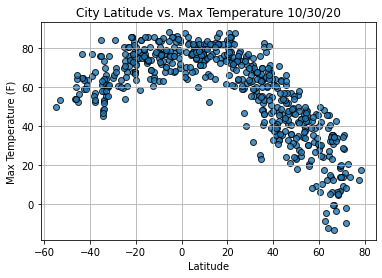

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()


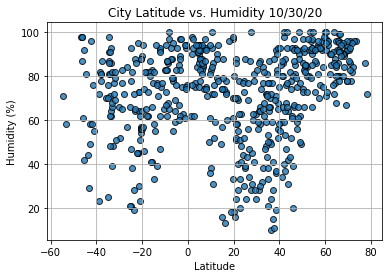

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

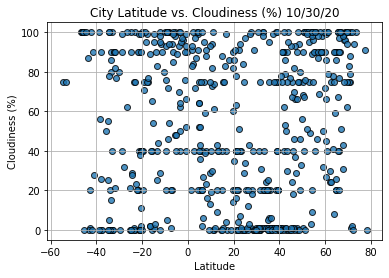

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

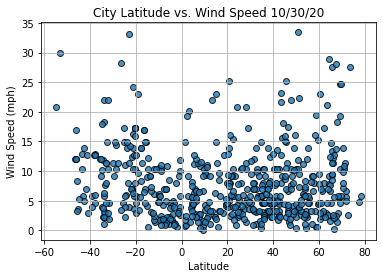

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()